In [1]:
#using scikit-learn to fit a classifier
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = {
    'total_day_charge': np.random.uniform(20, 60, 100),
    'total_eve_charge': np.random.uniform(10, 40, 100),
    'churn': np.random.choice([0, 1], 100)
}
churn_df=pd.DataFrame(data)

X=churn_df[['total_day_charge','total_eve_charge']].values
Y=churn_df['churn'].values
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, Y)

KNeighborsClassifier()

In [2]:
X_new=np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
predictions=knn.predict(X_new)
print("Predictions for values : {}".format(predictions))

Predictions for values : [1 1 1]


0.5666666666666667
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
 {1: 1.0, 2: 0.7857142857142857, 3: 0.7714285714285715, 4: 0.6714285714285714, 5: 0.7714285714285715, 6: 0.7285714285714285, 7: 0.7571428571428571, 8: 0.7142857142857143, 9: 0.6571428571428571, 10: 0.6285714285714286, 11: 0.6857142857142857, 12: 0.6428571428571429, 13: 0.6, 14: 0.5857142857142857, 15: 0.5857142857142857} 
 {1: 0.5333333333333333, 2: 0.4666666666666667, 3: 0.5333333333333333, 4: 0.5, 5: 0.4, 6: 0.5, 7: 0.6, 8: 0.5333333333333333, 9: 0.5333333333333333, 10: 0.5666666666666667, 11: 0.5666666666666667, 12: 0.5333333333333333, 13: 0.6333333333333333, 14: 0.6, 15: 0.6333333333333333}


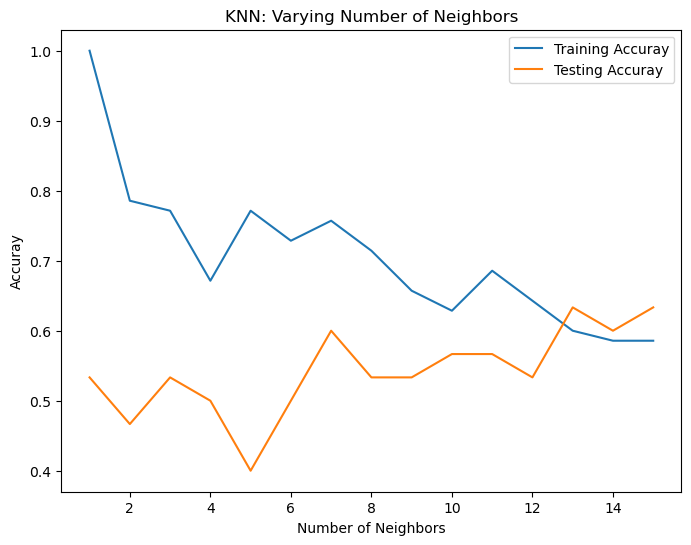

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=41,stratify=Y)
#knn=KNeighborsClassifier(n_neighbors=6)
#knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

train_accuracies={}
test_accuracies={}
neighbors=np.arange(1,16)
for neighbor in neighbors:
    knn=KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor]=knn.score(X_train,y_train)
    test_accuracies[neighbor]=knn.score(X_test,y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors,train_accuracies.values(),label="Training Accuray")
plt.plot(neighbors,test_accuracies.values(),label="Testing Accuray")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuray")
plt.show()

    